<p> En caso de correr el Script en Google Colab correr las siguientes lineas para instalar las librerías geopandas, geodatasets y mapclassify</p>

In [ ]:
!pip install geopandas

In [ ]:
!pip install geodatasets

In [ ]:
!pip install mapclassify

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd
import geodatasets
import folium
import mapclassify

In [ ]:
#Correr solo en google colab

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!ls "/content/drive/My Drive/"

'02.  Hoja de Vida2.pdf'
'05.  Declaración de Bienes y Rentas conflicto de intereses.pdf'
'06. Copia diploma certificado de estudios junto con el acta de grado.pdf'
'Analisis Espacial'
 ArticuloUSG
'Copia de CYTED 2022_informe_tecnico_avance_final_programas_y_proyectos_ctei_v.01_0.docx'
 FEXT-028_FICHATCNICADEPROYECTOSDEEXTENSINCONFINANCIACININTERNA_1.gdoc
 FINV-011_PresentacindeProyectosdeInvestigacin_3.gdoc
'TECNICAS DE MODELACION Y SIMULACION.xlsx'


In [ ]:
!ls "/content/drive/My Drive/Analisis Espacial/"

Fundamentos  Patrones


In [ ]:
#Ubique sus archivos contenidos en el Drive

!ls "/content/drive/My Drive/Analisis Espacial/Fundamentos"

1_AnalisisGeoespacialFundamentos.ipynb	FireStations.cpg  FireStations.prj  FireStations.shx
Austin_Fire_Stations.csv		FireStations.dbf  FireStations.shp


# Dataframes

In [5]:
# Crear un diccionario
DatosPrueba = {"Velocidad":[1.5,2.5,3.8,5], "Aceleracion":[8,8.5,9.1,7.4]}

In [6]:
DatosPrueba

{'Velocidad': [1.5, 2.5, 3.8, 5], 'Aceleracion': [8, 8.5, 9.1, 7.4]}

In [7]:
DatosPrueba2 = pd.DataFrame(DatosPrueba)

In [8]:
DatosPrueba2

,Velocidad,Aceleracion
0,1.5,8.0
1,2.5,8.5
2,3.8,9.1
3,5.0,7.4


In [9]:
DatosPrueba2["Velocidad"]

0    1.5
1    2.5
2    3.8
3    5.0
Name: Velocidad, dtype: float64

In [10]:
DatosPrueba2.Velocidad

0    1.5
1    2.5
2    3.8
3    5.0
Name: Velocidad, dtype: float64

In [11]:
DatosPrueba2.iloc[2,1]

9.1

In [12]:
DatosPrueba2.iloc[:,1]

0    8.0
1    8.5
2    9.1
3    7.4
Name: Aceleracion, dtype: float64

In [13]:
DatosPrueba2.iloc[1:4,1]

1    8.5
2    9.1
3    7.4
Name: Aceleracion, dtype: float64

In [14]:
DatosPrueba2.loc[2]

Velocidad      3.8
Aceleracion    9.1
Name: 2, dtype: float64

In [15]:
DatosPrueba2.index

RangeIndex(start=0, stop=4, step=1)

<h1 style="font-size:4em; color: red;">1. Conceptos</h1>

<h2 style="font-size:3em; color: green;">1.1. Análisis espacial</h2>

<p style="font-size=14pt;"> Son una colección de métodos que integran conceptos como la localización, el área, la distacia y la interacción de objetos con el propósito de análizar, investigar y explicar patrones, acciones o comportamientos de observaciones espacialmente referenciadas.</p> <br>

<p style="font-size=14pt"> Por ejemplo, mediante el análisis espacial es posible identificar el agrupamiento de una enfermedad que esté ocurriendo en algún lugar del mundo y tomar decisiones para prevenir su expansión o eliminarla. </p>

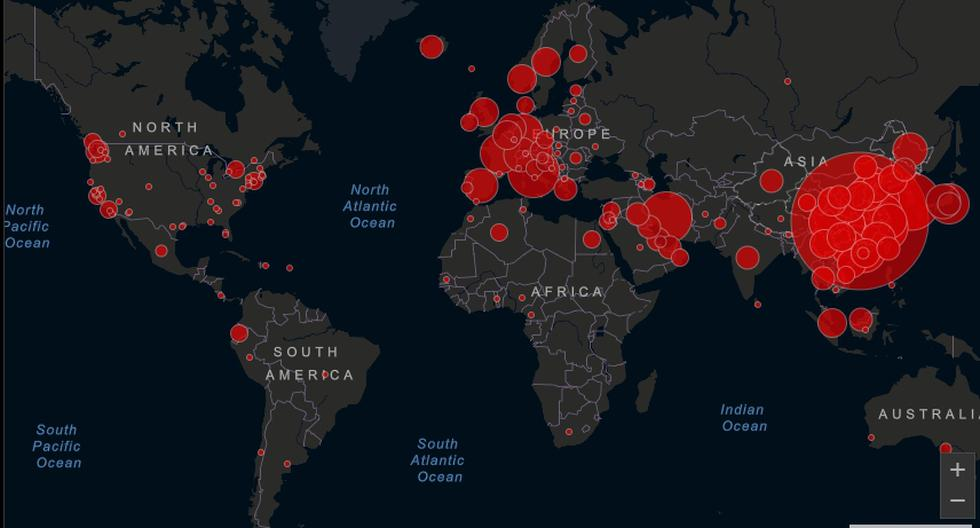

<h2 style="font-size:3em; color:green;">1.2. Tipos de análisis espacial</h2><br>

<ul>
<li><b>Análisis de patrones de puntos espaciales:</b> los puntos de datos pueden exhibir estados como agrupamiento, dispersión o aleatoreidad.</li>
<li><b>Análisis espacial para datos de área:</b> los datos se agregan en zonas predefinidas y el análisis se basa en cómo se comportan las zonas vecinas y si existen relaciones o interacciones entre ellos.</li>
<li><b>Análisis de datos geoestadísticos</b></li>
<li><b>Modelado espacial</b></li>
</ul>

<h1 style="font-size:4em; color: red;">2. Análisis de patrones de puntos espaciales</h1>

<p style="font-size:14pt">Links relacionados:</p>

<a href="https://gistbok.ucgis.org/bok-topics/point-pattern-analysis">Point Pattern Analysis</a> <br>
<a href="https://jo-wilkin.github.io/GEOG0030/coursebook/analysing-spatial-patterns-iii-point-pattern-analysis.html">Analysing Spatial Patterns III: Point Pattern Analysis</a>

In [ ]:
path = "/content/drive/My Drive/Analisis Espacial/Fundamentos/"

In [ ]:
df = pd.read_csv(path+"Austin_Fire_Stations.csv")

In [ ]:
df

,Name,Jurisdiction Name,Y,X,Location 1
0,FS0031,AFD,30.357735,-97.786768,"5507 Fm 2222 Rd\nAUSTIN, TX 78731\n(30.357735,..."
1,FS0002,AFD,30.282028,-97.742966,"506 W Martin Luther King Blvd\nAUSTIN, TX 7870..."
2,FS0007,AFD,30.258012,-97.724202,"201 Chicon St\nAUSTIN, TX 78702\n(30.258012, -..."
3,FS0030,AFD,30.384010,-97.692135,"1021 W Braker Ln\nAUSTIN, TX 78758\n(30.38401,..."
4,FS0040,AFD,30.399411,-97.653281,"12711 Harrisglenn Dr\nAUSTIN, TX 78753\n(30.39..."
5,FS0023,AFD,30.352341,-97.678561,"1330 E Rundberg Ln\nAUSTIN, TX 78753\n(30.3523..."
6,FS0035,AFD,30.210129,-97.724558,"5500 Burleston Rd\nAUSTIN, TX 78744\n(30.21012..."
7,FS0010,AFD,30.295395,-97.766826,"3009 Windsor Rd\nAUSTIN, TX 78703\n(30.295395,..."
8,FS0015,AFD,30.257543,-97.693214,"829 Airport Blvd\nAUSTIN, TX 78702\n(30.257543..."
9,FS0043,AFD,30.183114,-97.897652,"11401 Escarpment Blvd\nAUSTIN, TX 78749\n(30.1..."


In [ ]:
len(df)

44

In [ ]:
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df["X"], df["Y"]),crs="EPSG:4326")

In [ ]:
gdf

,Name,Jurisdiction Name,Y,X,Location 1,geometry
0,FS0031,AFD,30.357735,-97.786768,"5507 Fm 2222 Rd\nAUSTIN, TX 78731\n(30.357735,...",POINT (-97.78677 30.35774)
1,FS0002,AFD,30.282028,-97.742966,"506 W Martin Luther King Blvd\nAUSTIN, TX 7870...",POINT (-97.74297 30.28203)
2,FS0007,AFD,30.258012,-97.724202,"201 Chicon St\nAUSTIN, TX 78702\n(30.258012, -...",POINT (-97.72420 30.25801)
3,FS0030,AFD,30.384010,-97.692135,"1021 W Braker Ln\nAUSTIN, TX 78758\n(30.38401,...",POINT (-97.69213 30.38401)
4,FS0040,AFD,30.399411,-97.653281,"12711 Harrisglenn Dr\nAUSTIN, TX 78753\n(30.39...",POINT (-97.65328 30.39941)
5,FS0023,AFD,30.352341,-97.678561,"1330 E Rundberg Ln\nAUSTIN, TX 78753\n(30.3523...",POINT (-97.67856 30.35234)
6,FS0035,AFD,30.210129,-97.724558,"5500 Burleston Rd\nAUSTIN, TX 78744\n(30.21012...",POINT (-97.72456 30.21013)
7,FS0010,AFD,30.295395,-97.766826,"3009 Windsor Rd\nAUSTIN, TX 78703\n(30.295395,...",POINT (-97.76683 30.29539)
8,FS0015,AFD,30.257543,-97.693214,"829 Airport Blvd\nAUSTIN, TX 78702\n(30.257543...",POINT (-97.69321 30.25754)
9,FS0043,AFD,30.183114,-97.897652,"11401 Escarpment Blvd\nAUSTIN, TX 78749\n(30.1...",POINT (-97.89765 30.18311)


In [ ]:
gdf.explore(column="Name", legend=False, color="black", marker_kwds=dict(radius=15, fill=True))

Text(0.5, 1.0, 'Fire stations - Austin, Texas')

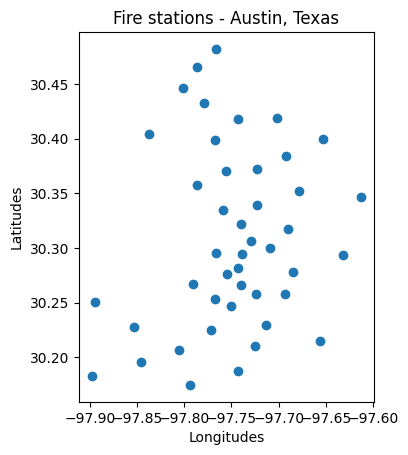

In [ ]:
gdf.plot()
plt.xlabel("Longitudes")
plt.ylabel("Latitudes")
plt.title("Fire stations - Austin, Texas")

<h2 style="font-size:3em; color: green;">2.1. Medidas de tendencia central</h2><br>
<p style="font-size:14px">Las estadísticas descriptivas proporcionan un resumen de las características básicas de un patrón de puntos, como su tendencia central y dispersión. La tendencia central se centra en extraer la ubicación central o típica de un patrón de puntos.</p>

<ol>
<li>Media</li>
<li>Mediana</li>
</ol>

<p style="font-size: 14px"><b>Media</b></p>

$(\mu_{x}, \mu_{y}) = \left( \frac{\sum_{i=1}^{n} x_i}{n}, \frac{\sum_{i=1}^{n} y_i}{n} \right)$

<p style="font-size: 14px"><b>Media ponderada</b></p>

$x' = \frac{\sum_{i=1}^{n} w_{i}x_{i}}{\sum_{i=1}^{n} {w_i}}$

$y' = \frac{\sum_{i=1}^{n} w_{i}y_{i}}{\sum_{i=1}^{n} w_i}$

donde $w$ representa una variable, normalmente no espacial, medida en cada punto. Por ejemplo, los puntos pueden ser nucleos urbanos y $w$ su población.

<p style="font-size: 14px"><b>Centro mediano</b></p>

Cuando $n$ es impar

$
x = x_{\frac{n+1}{2}}
$

$
y = y_{\frac{n+1}{2}}
$

Cuando $n$ es par

$
x = \frac{x_{\frac{n}{2}} + x_{\frac{n}{2}+1}}{2}
$

$
y = \frac{y_{\frac{n}{2}} + y_{\frac{n}{2}+1}}{2}
$

En otro caso:

El método que se utiliza para calcular el <a href="https://pro.arcgis.com/es/pro-app/latest/tool-reference/spatial-statistics/h-how-median-center-spatial-statistics-works.htm">Centro mediano</a>  es un procedimiento iterativo que introdujo Kuhn y Kuenne (1962) y que se describió en Burt y Barber (1996). En cada paso ($t$) del algoritmo, se encuentra un Centro mediano candidato ($x_t, y_t$) y se delimita hasta que represente la ubicación que minimiza la Distancia euclidiana ($d^t$) a todas las entidades (o a todas las entidades ponderadas) ($i$) en el dataset.<br>

Burt, J. E. y G. Barber. (1996). Estadísticas elementales para los geógrafos. Guilford, Nueva York.<br>

Kuhn, H. W. y R. E. Kuenne (1962). Un algoritmo eficiente para la solución numérica del Problema de Weber generalizado en economías espaciales. Publicación de Ciencia Regional, 4(2):21–33.

$d_{i} = d^{t}= \sqrt{(x_{i}-x^{t})^{2} + (y_{i}-y^{t})^{2} + (z_{i}-z^{t})^{2} }$

Mientras que la herramienta Centro medio devuelve un punto en las coordenadas X promedio, Y promedio y, si procede, en la coordenada z, para todos los centroides de entidad, la herramienta Centro mediano utiliza un algoritmo iterativo para buscar el punto que reduce la distancia euclidiana a todas las entidades en el dataset. El centro mediano se ve menos afectado por los valores atípicos que el centro medio.

<p style="font-size: 14px"><b>Moda</b></p>

Es el valor que se repite el mayor número de veces dentro de un conjunto de datos

$
Moda =  L_i + \frac{f_i - f_{i-1}}{(f_i - f_{i-1})+(f_i - f_{i+1})}
$

$L_i$ es el límite inferior del intervalo modal (intervalo con mayor frecuencia absoluta)

$f_i$ es la frecuencia absoluta del intervalo modal

$f_{i-1}$ es la frecuencia absoluta del intervalo anterior al modal

$f_{i+1}$ es la frecuencia absoluta del intervalo posterior al modal

$A_i$ es la amplitud del intervalo modal

In [ ]:
EjemploHist = np.random.normal(0,1,1000)

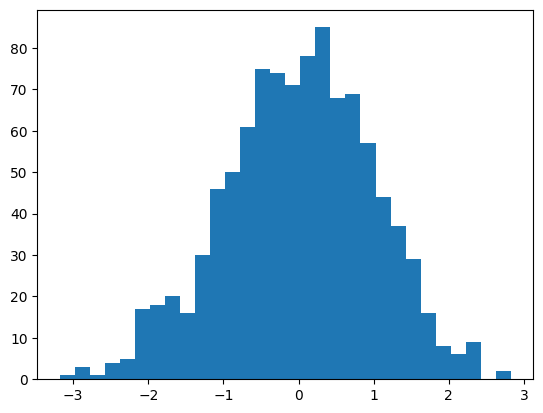

In [ ]:
plt.hist(EjemploHist, bins=30)
plt.show()

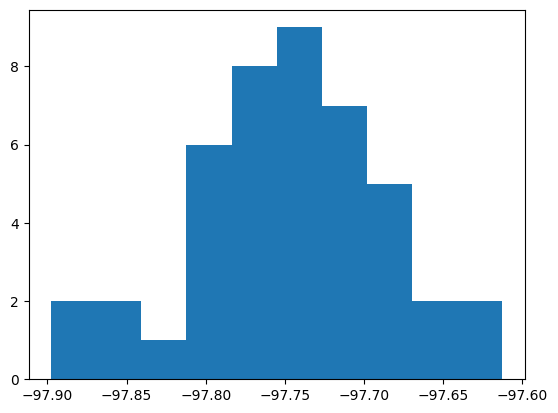

In [ ]:
plt.hist(df.X)
plt.show()

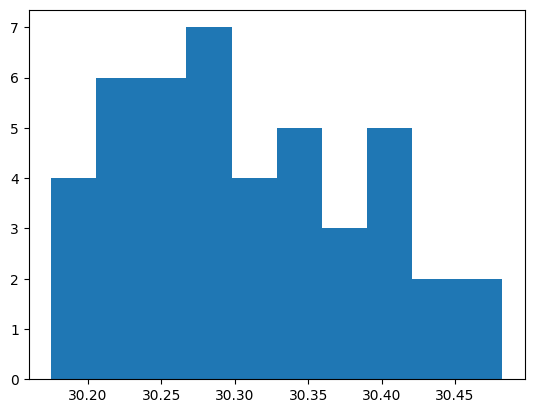

In [ ]:
plt.hist(df.Y)
plt.show()

https://www.lifeder.com/frecuencia-absoluta/

In [ ]:
avgx = gdf["X"].mean()
avgy = gdf["Y"].mean()

In [ ]:
avg = {"X":[avgx],"Y":[avgy]}
avg = pd.DataFrame.from_dict(avg)
avg = gpd.GeoDataFrame(avg, geometry= gpd.points_from_xy(avg.X, avg.Y),crs="EPSG:4326")

In [ ]:
avg

,X,Y,geometry
0,-97.748171,30.307851,POINT (-97.74817 30.30785)


In [ ]:
#tiles=["OpenStreetMap", "Stamen Terrain", “Stamen Toner", “Stamen Watercolor" "CartoDB positron", “CartoDB dark_matter"]
mvvvvvvv = gdf.explore(column="Name", legend=False, tiles="CartoDB positron",marker_kwds=dict(radius=5, fill=True))
avg.explore(m=mvvvvvvv, color="red", marker_kwds=dict(radius=20, fill=True))


Text(0.5, 1.0, 'Fire stations - Austin, Texas')

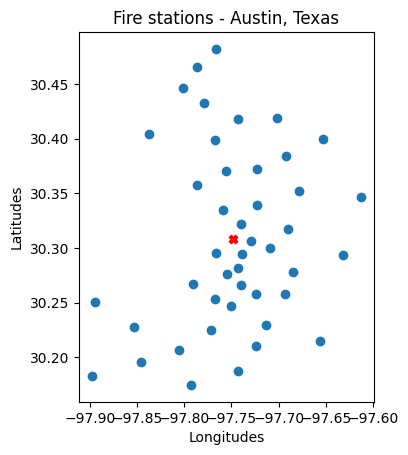

In [ ]:
ax = gdf.plot()
avg.plot(ax=ax, color="red", marker="X")
plt.xlabel("Longitudes")
plt.ylabel("Latitudes")
plt.title("Fire stations - Austin, Texas")

In [ ]:
medx = gdf["X"].median()
medy = gdf["Y"].median()

In [ ]:
med = {"X":[medx],"Y":[medy]}
med = pd.DataFrame.from_dict(med)
med = gpd.GeoDataFrame(med, geometry= gpd.points_from_xy(med.X, med.Y),crs="EPSG:4326")

In [ ]:
mediana = [[medx,medy]]
N = len(gdf)
x = np.array(gdf.X)
y = np.array(gdf.Y)
d = [np.sqrt((x-medx)**2 + (y-medy)**2)]
mediana

[[-97.742782, 30.295068]]

In [ ]:
d[0]

array([0.07656318, 0.0130413 , 0.04145315, 0.10235135, 0.1374696 ,
       0.0860496 , 0.08687202, 0.02404622, 0.06217003, 0.19109792,
       0.02940366, 0.04871972, 0.04887414, 0.1417924 , 0.11136699,
       0.14471967, 0.12982931, 0.0490756 , 0.07215123, 0.00436726,
       0.17631496, 0.13044997, 0.04276189, 0.10769316, 0.14297283,
       0.03436925, 0.07949476, 0.13985777, 0.0222075 , 0.15810391,
       0.10857502, 0.05683942, 0.10650594, 0.02742386, 0.18849149,
       0.11767763, 0.13081426, 0.12310115, 0.01726254, 0.16262586,
       0.05500934, 0.07694872, 0.06014347, 0.07565219])

https://es.wikipedia.org/wiki/Coordenadas_geogr%C3%A1ficas

In [ ]:
def centroMediano(x,y,d,w,mediana,iter):
  for i in range(iter):
    i
    Mx = ((w*x)/d[0]).sum()/(w/d[0]).sum()
    My = ((w*y)/d[0]).sum()/(w/d[0]).sum()
    mediana.append([Mx,My])
    diffx = (x-Mx)**2
    diffy = (y-My)**2
    d=[np.sqrt(diffx+diffy)]
  return mediana


$
d_i = \sqrt{(x_i - Med_x)^2 + (y_i - Med_y)^2 }
$

$
\mu_x = \frac{\sum \frac{w_i * x_i}{d_i} }{ \sum \frac{w_i}{d_i}}
$

$
d_i^{*} = \sqrt{(x_i - \mu_x)^2 + (y_i - \mu_x)^2 }
$

In [ ]:
datosAllenar= [1,10]

for i in range(4):
  val = 2.5*i - 4
  datosAllenar.append(val)

In [ ]:
datosAllenar

[1, 10, -4.0, -1.5, 1.0, 3.5]

In [ ]:
centroMediano(x,y,d,1,mediana, 4)


[[-97.742782, 30.295068],
 [-97.74127577047152, 30.29676589521409],
 [-97.74060013373648, 30.297558291192857],
 [-97.74037042994114, 30.29799225212788],
 [-97.74030570090915, 30.2982694043132]]

In [ ]:
mediana = np.array(mediana)
mediana[1,0]

-97.74127577047152

In [ ]:
med1 = {"X":[mediana[1,0]],"Y":[mediana[1,1]]}
med1 = pd.DataFrame.from_dict(med1)
med1 = gpd.GeoDataFrame(med1, geometry= gpd.points_from_xy(med1.X, med1.Y),crs="EPSG:4326")

In [ ]:
med2 = {"X":[mediana[2,0]],"Y":[mediana[2,1]]}
med2 = pd.DataFrame.from_dict(med2)
med2 = gpd.GeoDataFrame(med2, geometry= gpd.points_from_xy(med2.X, med2.Y),crs="EPSG:4326")

In [ ]:
med3 = {"X":[mediana[3,0]],"Y":[mediana[3,1]]}
med3 = pd.DataFrame.from_dict(med3)
med3 = gpd.GeoDataFrame(med3, geometry= gpd.points_from_xy(med3.X, med3.Y),crs="EPSG:4326")

In [ ]:
med4 = {"X":[mediana[4,0]],"Y":[mediana[4,1]]}
med4 = pd.DataFrame.from_dict(med4)
med4 = gpd.GeoDataFrame(med4, geometry= gpd.points_from_xy(med4.X, med4.Y),crs="EPSG:4326")

In [ ]:
#tiles=["OpenStreetMap", "Stamen Terrain", “Stamen Toner", “Stamen Watercolor" "CartoDB positron", “CartoDB dark_matter"]
m = gdf.explore(column="Name", legend=False, tiles="OpenStreetMap",marker_kwds=dict(radius=5, fill=True))
m=avg.explore(m=m, color="red", marker_kwds=dict(radius=20, fill=True))
m= med.explore(m=m, color="purple", marker_kwds=dict(radius=20, fill=True))
m= med1.explore(m=m, color="blue", marker_kwds=dict(radius=20, fill=True))
m= med2.explore(m=m, color="green", marker_kwds=dict(radius=20, fill=True))
m= med3.explore(m=m, color="yellow", marker_kwds=dict(radius=20, fill=True))
med4.explore(m=m, color="orange", marker_kwds=dict(radius=20, fill=True))

<p>Cuando la distribución de los datos es simétrica, es decir, cuando la mitad de los datos están por encima del valor central y la otra mitad está por debajo. En este caso, tanto la mediana como la media coincidirán en el mismo valor. Sin embargo, si la distribución de los datos es asimétrica, es poco probable que la mediana y la media sean iguales.</p><br>

<p>El centro mediano (o mediana) a menudo se considera un indicador más robusto y menos afectado por puntos atípicos que el centro medio.</p>

<h2 style="font-size:3em; color: green;">2.2. Medidas de dispersión</h2><br>
<p style="font-size:14px">Las medidas de dispersión son indicadores (como la desviación estándar) que permiten observar como se extiende un patron de puntos en el espacio.</p>

<p>Matemáticamente la desviación estándar la podemos representar mediante las siguientes ecuaciones:</p><br>


$
\begin{equation}
\begin{pmatrix}
\tilde x \\
\tilde y
\end{pmatrix}=
w \cdot \begin{pmatrix}
 x_i \\
 y_i
\end{pmatrix} -\begin{pmatrix}
 \mu_x \\
 \mu_y
\end{pmatrix}
 \tag{5}
\end{equation}
$

$\sigma_{x}= \sqrt{\frac{1}{n} \sum_{1}^{n} \left( \tilde y_{i} sen \theta + \tilde x_{i} cos \theta\right)^{2}}$

$\sigma_{y}= \sqrt{\frac{1}{n} \sum_{1}^{n} \left( \tilde y_{i} cos \theta + \tilde x_{i} sen \theta\right)^{2}}$

$\theta = tan^{-1} \frac{(\sum_{i=1}^{n} \tilde x_{i}^{2} - \sum_{i=1}^{n} \tilde y_{i}^{2}) + \sqrt{(\sum_{i=1}^{n} \tilde x_{i}^{2} - \sum_{i=1}^{n} \tilde y_{i}^{2}) + 4(\sum_{i=1}^{n} \tilde x_{i} \tilde y_{i})^{2}} }{2(\sum_{i=1}^{n} \tilde x_{i} \tilde y_{i})^{2}}$

Donde,<br>
$\mu_{x}, \mu_{y}$ representan la media de las coordenadas (Ec. 1)<br>
$w$ la matriz de pesos<br>
$\sigma_{x}, \sigma_{y}$ los semieje mayor y menor de la desviación estándar<br>
$\theta$ el ángulo de rotación<br>

In [ ]:
w= 1
x_i = (gdf.X * w)-avgx
y_i = (gdf.Y * w)-avgy

In [ ]:
x_i2 = (x_i**2).sum()
y_i2 = (y_i**2).sum()
xi2_yi2 = x_i2-y_i2
xiyi = (x_i*y_i).sum()
xiyi2 = xiyi**2

In [ ]:
xiyi

0.03751972340527225

In [ ]:
theta = np.arctan((xi2_yi2 + np.sqrt(np.abs(xi2_yi2) + 4*xiyi2))/(2*xiyi2))
theta

1.5589437018228662

In [ ]:
n = len(gdf)
ysen = y_i* (np.sin(theta))
ycos = y_i*np.cos(theta)
xsen = x_i*np.sin(theta)
xcos = x_i*np.cos(theta)
sigmax = np.sqrt( (1/n) * ((ysen+xcos)**2).sum() )
sigmay = np.sqrt( (1/n) * ((ycos+xsen)**2).sum() )

In [ ]:
sigmax

0.08161140980569222

In [ ]:
sigmay

0.061268830236383166

In [ ]:
xmin = avgx-sigmax
xmax = avgx+sigmax
ymin = avgy-sigmay
ymax = avgy+sigmay

In [ ]:
xmin

-97.82978231889659

In [ ]:
xmax

-97.66655949928521

In [ ]:
ymax

30.369120012054566

In [ ]:
ymin

30.2465823515818

In [ ]:
sigmax**2

0.006660422210472636

In [ ]:
sigmay**2

0.00375386955853474

In [ ]:
sigmax**2 * sigmay**2

2.500235618288189e-05

$
0.00375*x^2 + 0.00666*y^2 = 0.000024975
$

$
y = \sqrt{\frac{0.000024975-0.00375*x^2}{0.0066}}
$

In [ ]:
x_rango = np.linspace(-sigmax,sigmax,500)

In [ ]:
x_rango_2 = x_rango**2

In [ ]:
y_rango_M = np.sqrt(((sigmax**2 * sigmay**2)-(sigmay**2* x_rango_2))/sigmax**2)

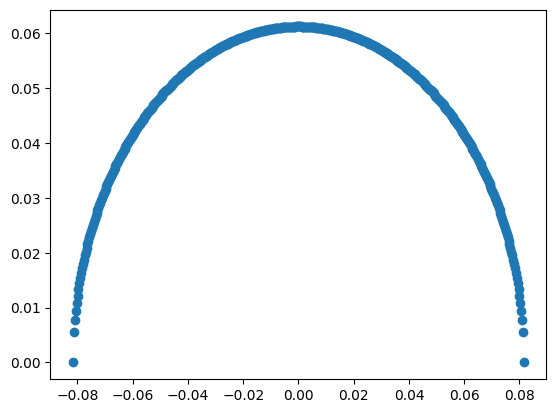

In [ ]:
plt.scatter(x_rango,y_rango_M)

In [ ]:
y_rango_m = -np.sqrt(((sigmax**2 * sigmay**2)-(sigmay**2* x_rango_2))/sigmax**2)

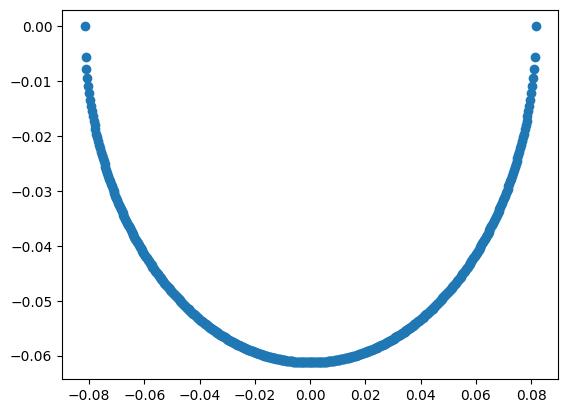

In [ ]:
plt.scatter(x_rango,y_rango_m)

In [ ]:
y_rango_f = np.array([y_rango_M,y_rango_m]).flatten()

In [ ]:
x_rango_f = np.array([x_rango,x_rango]).flatten()

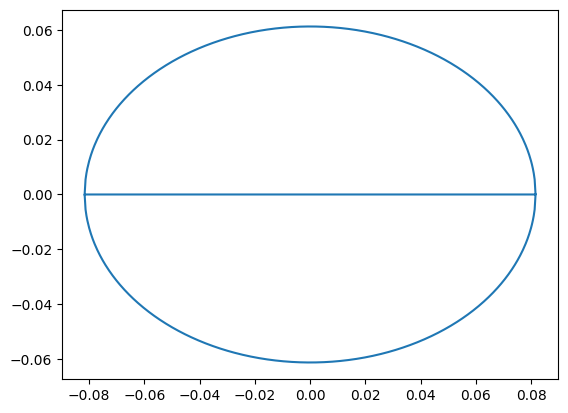

In [ ]:
plt.plot(x_rango_f,y_rango_f)

In [ ]:
from geopandas import GeoSeries
from shapely.geometry import Polygon
from shapely.geometry import LineString

In [ ]:
series_=[(ij) for ij in zip(x_rango_f+avgx,y_rango_f+avgy)]

In [ ]:
series_

[(-97.82978231889659, 30.307851181818183),
 (-97.82945521905769, 30.313331221586516),
 (-97.8291281192188, 30.31559334339997),
 (-97.8288010193799, 30.317323810296486),
 (-97.828473919541, 30.31877819919947),
 (-97.8281468197021, 30.320055612228792),
 (-97.82781971986319, 30.32120692697438),
 (-97.82749262002429, 30.322262397240234),
 (-97.82716552018539, 30.323241754433834),
 (-97.82683842034649, 30.324158717351427),
 (-97.82651132050759, 30.325023284168562),
 (-97.8261842206687, 30.325843009888985),
 (-97.82585712082978, 30.326623769539648),
 (-97.82553002099088, 30.327370239593197),
 (-97.82520292115198, 30.32808621523358),
 (-97.82487582131309, 30.328774827113723),
 (-97.82454872147419, 30.329438693991158),
 (-97.82422162163529, 30.330080033012443),
 (-97.82389452179639, 30.330700741184792),
 (-97.82356742195748, 30.331302456736903),
 (-97.82324032211858, 30.33188660612507),
 (-97.82291322227968, 30.33245444058901),
 (-97.82258612244078, 30.333007064965273),
 (-97.82225902260188, 3

<Axes: >

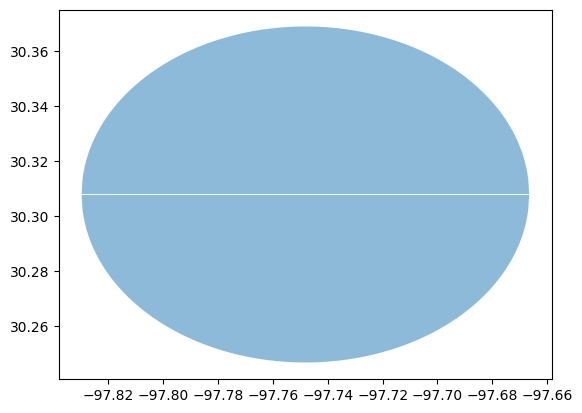

In [ ]:
p1 = Polygon(series_)
g = GeoSeries(p1)
g.plot(alpha=0.5)

In [ ]:
#tiles=["OpenStreetMap", "Stamen Terrain", “Stamen Toner", “Stamen Watercolor" "CartoDB positron", “CartoDB dark_matter"]
m = gdf.explore(column="Name", legend=False, tiles="OpenStreetMap",marker_kwds=dict(radius=5, fill=True))
m= g.explore(m=m, color="black")
m=avg.explore(m=m, color="red", marker_kwds=dict(radius=20, fill=True))
m= med.explore(m=m, color="purple", marker_kwds=dict(radius=20, fill=True))
m= med1.explore(m=m, color="blue", marker_kwds=dict(radius=20, fill=True))
m= med2.explore(m=m, color="green", marker_kwds=dict(radius=20, fill=True))
m= med3.explore(m=m, color="yellow", marker_kwds=dict(radius=20, fill=True))
med4.explore(m=m, color="orange", marker_kwds=dict(radius=20, fill=True))

<Axes: >

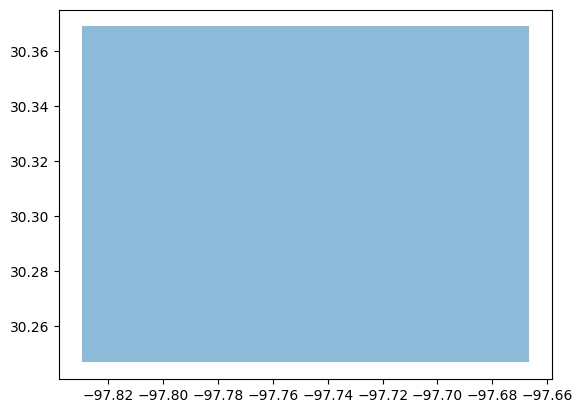

In [ ]:
p1 = Polygon([(xmin, ymin), (xmin, ymax) ,(xmax,ymax),(xmax, ymin)])
g2 = GeoSeries(p1)
g2.plot(alpha=0.5)

#Con la función buffer puedo crear un margen del borde del poligono creado, en este caso la desviación estandar

In [ ]:
[(xmin, ymin), (xmin, ymax) ,(xmax,ymax),(xmax, ymin)]

[(-97.82978231889659, 30.2465823515818),
 (-97.82978231889659, 30.369120012054566),
 (-97.66655949928521, 30.369120012054566),
 (-97.66655949928521, 30.2465823515818)]

In [ ]:
#tiles=["OpenStreetMap", "Stamen Terrain", “Stamen Toner", “Stamen Watercolor" "CartoDB positron", “CartoDB dark_matter"]
m = gdf.explore(column="Name", legend=False, tiles="OpenStreetMap",marker_kwds=dict(radius=5, fill=True))
m= g.explore(m=m, color="black")
m= g2.explore(m=m, color="gray")
m=avg.explore(m=m, color="red", marker_kwds=dict(radius=20, fill=True))
m= med.explore(m=m, color="purple", marker_kwds=dict(radius=20, fill=True))
m= med1.explore(m=m, color="blue", marker_kwds=dict(radius=20, fill=True))
m= med2.explore(m=m, color="green", marker_kwds=dict(radius=20, fill=True))
m= med3.explore(m=m, color="yellow", marker_kwds=dict(radius=20, fill=True))
med4.explore(m=m, color="orange", marker_kwds=dict(radius=20, fill=True))


In [ ]:
import shapely

In [ ]:
from shapely.geometry import Polygon, LineString, Point

In [ ]:
#Definir componentes de la elipse
ellipseF = ((avgx, avgy),(sigmax, sigmay),theta)

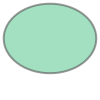

In [ ]:
ell  = shapely.affinity.scale(Point(ellipseF[0]).buffer(1), ellipseF[1][0], ellipseF[1][1]) #tomamos sigmax y sigmay para crear elipse
ell

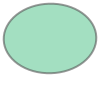

In [ ]:
ellr = shapely.affinity.rotate(ell,ellipseF[2]) #rotamos la elipse
ellr

In [ ]:
ellr = gpd.GeoSeries([ellr])

In [ ]:
ellr

0    POLYGON ((-97.66659 30.31007, -97.66682 30.304...
dtype: geometry

In [ ]:
gdf.to_file("FireStations.shp")

<ipython-input-152-eda022ea1985>:1: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  gdf.to_file("FireStations.shp")


In [ ]:
#tiles=["OpenStreetMap", "Stamen Terrain", “Stamen Toner", “Stamen Watercolor" "CartoDB positron", “CartoDB dark_matter"]
m = gdf.explore(column="Name", legend=False, tiles="OpenStreetMap",marker_kwds=dict(radius=5, fill=True))
m= ellr.explore(m=m, color="black")
#m= g.explore(m=m, color="#0DE71A")
#m= g2.explore(m=m, color="gray")
m=avg.explore(m=m, color="red", marker_kwds=dict(radius=20, fill=True))
m= med.explore(m=m, color="purple", marker_kwds=dict(radius=20, fill=True))
m= med1.explore(m=m, color="blue", marker_kwds=dict(radius=20, fill=True))
m= med2.explore(m=m, color="green", marker_kwds=dict(radius=20, fill=True))
m= med3.explore(m=m, color="yellow", marker_kwds=dict(radius=20, fill=True))
med4.explore(m=m, color="orange", marker_kwds=dict(radius=20, fill=True))

In [ ]:
# Para exportar nuestros datos, geopandas requiere que el nombre de las columnas no exceda los 10 caracteres.
# Para ello realizamos lo siguiente con la columna "Jurisdiction Name"

gdf.rename({"Jurisdiction Name":"Jurisdict"}, inplace=True)

In [ ]:
gdf.to_file("FireStations.shp")

<ipython-input-155-eda022ea1985>:1: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  gdf.to_file("FireStations.shp")
